In [1]:
import pyforest

In [51]:
from sklearn.datasets import load_boston
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

## Load Data

In [4]:
df = load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
dataset = pd.DataFrame(data=df.data, columns=df.feature_names)
dataset.head(2)

<IPython.core.display.Javascript object>

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [9]:
dataset.shape

(506, 13)

In [8]:
df.target.shape

(506,)

In [10]:
dataset['target'] = df.target
dataset.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [11]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [13]:
y[:2]

0    24.0
1    21.6
Name: target, dtype: float64

## Linear Model

In [15]:
model = LinearRegression()

In [16]:
model

LinearRegression()

In [17]:

?cross_val_score

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None


In [24]:
%%time
mse = cross_val_score(model, X, y, scoring=make_scorer(metrics.mean_squared_error, greater_is_better=False), cv=3)

<IPython.core.display.Javascript object>

Wall time: 60.5 ms


In [25]:
mse

array([ -20.63230588,  -34.48294871, -451.90968255])

In [26]:
np.mean(mse)

<IPython.core.display.Javascript object>

-169.00831238145855

## Ridge Regression

In [31]:
ridge = Ridge()

In [32]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [34]:
parameters = {'alpha' : [1e-10, 1e-5, 1e-2, 1, 10, 20, 50, 100]}

In [35]:
? GridSearchCV

Init signature:
 GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    iid='deprecated',
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or 

In [36]:
%%time
ridge_regressor = GridSearchCV(ridge, parameters, scoring=make_scorer(metrics.mean_squared_error), cv=5)

<IPython.core.display.Javascript object>

Wall time: 28.5 ms


In [37]:
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 10, 20, 50, 100]},
             scoring=make_scorer(mean_squared_error))

In [38]:
ridge_regressor.best_params_

{'alpha': 1e-10}

In [39]:
ridge_regressor.best_score_

37.13180746720424

## Lasso Regression

In [41]:
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring=make_scorer(metrics.mean_squared_error), cv=5)


<IPython.core.display.Javascript object>

In [42]:
lasso_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 10, 20, 50, 100]},
             scoring=make_scorer(mean_squared_error))

In [44]:
lasso_regressor.best_params_, lasso_regressor.best_score_

({'alpha': 100}, 73.85835564329214)

## Predict

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
len(X_train), len(X_test), len(y_train), len(y_test)

(404, 102, 404, 102)

In [49]:
lasso_yhat = lasso_regressor.predict(X_test)

In [50]:
ridge_yhat = ridge_regressor.predict(X_test)

In [57]:
lasso_yhat.shape, type(lasso_yhat), type(y_test.values)

((102,), numpy.ndarray, numpy.ndarray)

In [59]:
lasso_yhat

array([25.06004796, 25.94712142, 16.33262887, 24.8507998 , 17.2539436 ,
       22.82336571, 24.87083376, 22.06986692, 17.29967985, 23.07396897,
       25.48573927, 24.7062093 , 15.92821765, 22.88026803, 25.2292769 ,
       17.20744805, 27.25301599, 17.19958714, 25.91422413, 17.30669214,
       26.59725081, 25.94712142, 24.67155789, 25.52672485, 16.9631343 ,
       17.10873994, 22.92341375, 15.56380158, 25.44846489, 23.07396897,
       25.06630096, 25.2550482 , 17.30669214, 17.23473795, 17.01364963,
       22.21956116, 26.18060604, 26.57627889, 25.39518037, 24.78943104,
       23.07396897, 26.61822272, 26.54791706, 24.03867709, 25.59048922,
       17.29566006, 24.66530489, 24.81873083, 17.30669214, 25.06630096,
       24.75172222, 26.72319599, 24.83560989, 23.21487669, 25.70792382,
       17.2697101 , 17.30128776, 26.13586866, 26.09392483, 24.31855166,
       25.31206826, 26.53000262, 24.7616458 , 24.35363736, 22.53786748,
       25.46476736, 17.2847173 , 25.3808797 , 25.98339288, 15.58

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='target', ylabel='Count'>

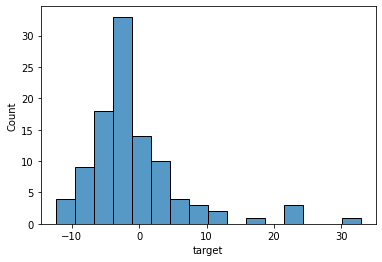

In [64]:
sns.histplot(y_test - lasso_yhat)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='target', ylabel='Count'>

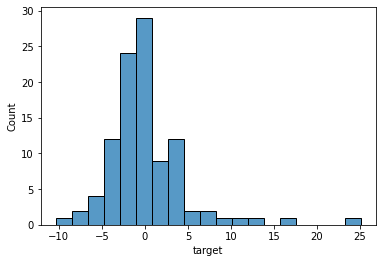

In [65]:
sns.histplot(y_test - ridge_yhat)

## Since, most of the erros in 0 in the above plot, second one seems good.